In [10]:
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers

# Capacity
    A models capacity refers to size and complexity of the patterns it is able to learn. 
    the capacity of a network can be increased either by making it wider (more units to existing layers) or by making it deeper (adding more layers). 
    Wider networks have an easier time learning more linear relationships, 
    while deeper networks prefer more nonlinear ones.

In [9]:
model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(1),
])
wider = keras.Sequential([
    layers.Dense(32, activation='relu'),
    layers.Dense(1),
])

deeper = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1),
])

# Early Stopping
    when a model is too eagerly learning noise, the validation loss may start to increase during training. To prevent this, we can simply stop the training whenever it seems the validation loss isn't decreasing anymore. Interrupting the training this way is called early stopping

In [11]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    min_delta=0.001, #minimum amout of change to count as an improvement
    patience=20, #how many epochs to wait before stopping
    restore_best_weights=True,
)

In [12]:
import pandas as pd
from IPython.display import display

redwine = pd.read_csv(r'C:\Users\suyog\DeepLearning\dataset\red-wine.csv')

In [15]:
#Create training and validation splits
df_train = redwine.sample(frac=0.7, random_state=0)
df_valid = redwine.drop(df_train.index)
display(df_train.head())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6
979,12.2,0.450,0.49,1.40,0.075,3.0,6.0,0.99690,3.13,0.63,10.4,5


In [17]:
#Scale to [0,1]
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

In [19]:
#Split features and target
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

In [25]:
from tensorflow import keras 
from tensorflow.keras import layers, callbacks

early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, #minimum amount of change to count as an improvement
    patience=20, #how many epochs to wait before stopping
    restore_best_weights=True,
)

In [29]:
model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[11]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])

In [30]:
model.compile(
    optimizer='adam',
    loss='mae',
)

In [32]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=500,
    callbacks=[early_stopping],
    verbose=0
)

Minimum validation loss: 0.0914638489484787


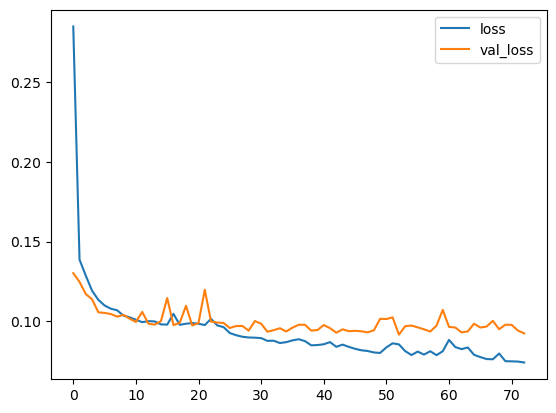

In [28]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))